In [1]:
#Evaluation 3

In [2]:
#Primero se utilizaran los mapas del trabajo anterior

In [3]:
import os

import geopandas as gpd
from  fiona import listlayers

#maps
romaniaMaps='https://github.com/Clases-y-Evaluaciones-DelaCruz-Diana/Evaluation3-DelaCruz/raw/main/maps/romaniaMaps_3844.gpkg'

#layers in maps
listlayers(romaniaMaps)

['countries', 'cities', 'rivers']

In [4]:
romania=gpd.read_file(romaniaMaps,layer='countries')
romania_cities=gpd.read_file(romaniaMaps,layer='cities')
romania_rivers=gpd.read_file(romaniaMaps,layer='rivers') 

In [5]:
romania.crs.to_epsg()==romania_cities.crs.to_epsg()==romania_rivers.crs.to_epsg()

True

<Axes: >

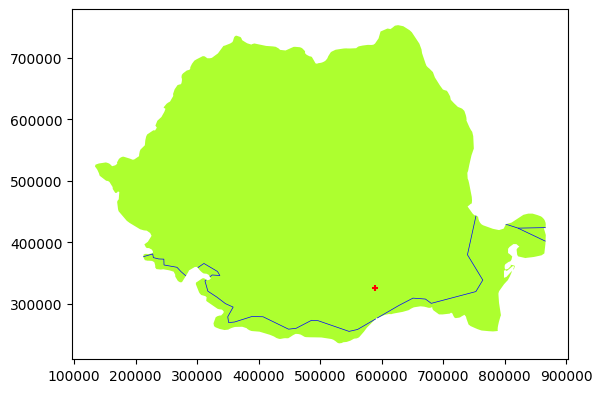

In [6]:
base = romania.plot(facecolor="greenyellow")
romania_rivers.plot(edgecolor='blue', linewidth=0.5,ax=base)
romania_cities.plot(marker='+', color='red', markersize=15,ax=base)

In [7]:
#Formating Geoseries projections

In [8]:
romania

COUNTRY                                           geometry
0  Romania  POLYGON ((314874.819 305425.196, 315538.064 31...

In [9]:
#Ejercicio 1.1 -> Es un poligono

In [10]:
romania.boundary

0    LINESTRING (314874.819 305425.196, 315538.064 ...
dtype: geometry

<Axes: >

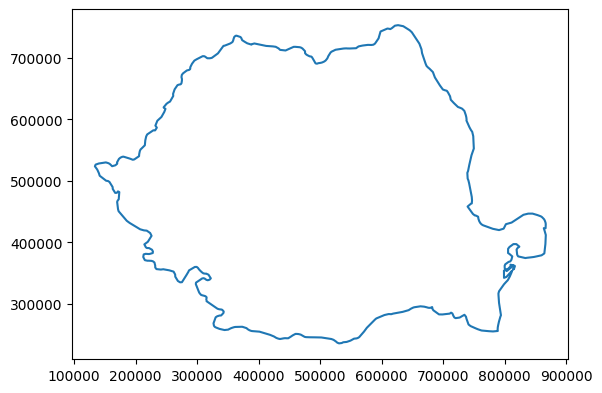

In [11]:
romania.boundary.plot()

In [12]:
#Ejercicio 1.2 -> Recuperando limites de Romania

In [13]:
type(romania.boundary)

geopandas.geoseries.GeoSeries

In [14]:
# convirtiendo a GDF
romania.boundary.to_frame()

0
0  LINESTRING (314874.819 305425.196, 315538.064 ...

In [15]:
# conversion
romania_border=romania.boundary.to_frame() 

# new column (optional)
romania_border['name']='Romania' 

# renaming the geometry column
romania_border.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
#cuando se coloca el set_geometry se debe colocar en comillas el nombre de la geometria
romania_border = romania_border.set_geometry("geometry")

# verifying:
romania_border.crs

<Projected CRS: EPSG:3844>
Name: Pulkovo 1942(58) / Stereo70
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Romania - onshore and offshore.
- bounds: (20.26, 43.44, 31.41, 48.27)
Coordinate Operation:
- name: Stereo 70
- method: Oblique Stereographic
Datum: Pulkovo 1942(58)
- Ellipsoid: Krassowsky 1940
- Prime Meridian: Greenwich

In [16]:
romania_border

geometry     name
0  LINESTRING (314874.819 305425.196, 315538.064 ...  Romania

In [17]:
#Ejercicio 1.3 -> Se convirtieron los limites en un GDF

In [18]:
#-------------------------------------------------------------

In [19]:
#Lacking CRS information

In [20]:
#Ejercicio 2.1 -> Se buscan divisiones subadministrativas de Romania

In [21]:
romania_states=gpd.read_file(os.path.join("maps","rou_adm_ancpi_v02_20220427_ab_shp","rou_admbnda_adm1_ancpi_v02_20220427.shp"))
romania_municipalities=gpd.read_file(os.path.join("maps","rou_adm_ancpi_v02_20220427_ab_shp","rou_admbnda_adm2_ancpi_v02_20220427.shp"))

In [22]:
#Ejercicio 2.2 -> Se consulta todos los CRS de esas divisiones.

In [23]:
romania_states.crs, romania_municipalities.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

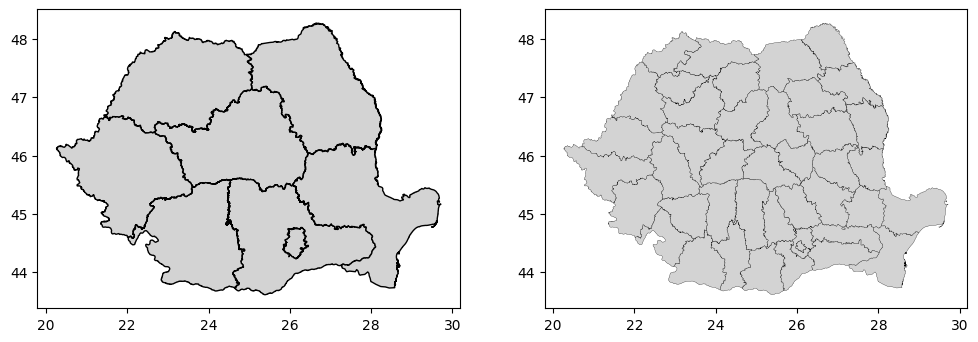

In [24]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

romania_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
romania_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [25]:
romania_states.geometry.head()

0    POLYGON ((26.30330 44.76770, 26.30480 44.76650...
1    MULTIPOLYGON (((23.66380 46.41530, 23.66390 46...
2    POLYGON ((26.70020 48.26540, 26.70190 48.26520...
3    MULTIPOLYGON (((23.63000 46.40440, 23.63010 46...
4    POLYGON ((24.75190 44.42570, 24.75190 44.42560...
Name: geometry, dtype: geometry

In [26]:
#Ejercicio 2.3 -> Primero de presenta el CRS no proyectado y despues la proyeccion correcta "3844"

In [27]:
romania_states.crs = "EPSG:4326"
romania_municipalities.crs = "EPSG:4326"

In [28]:
romania_states=romania_states.to_crs(3844)
romania_municipalities=romania_municipalities.to_crs(3844)

In [29]:
#--------------------------------------------------------------------------

In [30]:
#Projecting Lat/Lon Points

In [31]:
#Ejercicio 3.1 -> Se buscan puntos CSV en Romania: "aeropuertos"

In [32]:
import pandas as pd 

infoairports=pd.read_csv(os.path.join("data","ro-airports.csv"))

infoairports

id        ident                 type  \
0    #meta +id  #meta +code  #loc +airport +type   
1         4482         LROP        large_airport   
2         4474         LRBS       medium_airport   
3         4476         LRCL       medium_airport   
4         4488         LRTR       medium_airport   
..         ...          ...                  ...   
98      324127         LRBG             heliport   
99      351103      RO-0040             heliport   
100     354769         LRCC             heliport   
101     351076      RO-0035             heliport   
102     320578      RO-0017               closed   

                                   name        latitude_deg  \
0                   #loc +airport +name           #geo +lat   
1    Henri Coandă International Airport           44.571111   
2         Băneasa International Airport           44.503201   
3     Cluj-Napoca International Airport           46.785198   
4         Timişoara Traian Vuia Airport  45.809898376464844   
..                                  ...                 ...   
98                 IAR Ghimbav Heliport             45.6873   
99                    Năvodari Heliport            44.32903   
100                      Oituz Heliport            46.21056   
101             Caragea Dermen Heliport            44.23193   
102                      Aerodrom Cioca           45.786876   

          longitude_deg         elevation_ft                 continent  \
0             #geo +lon  #geo +elevation +ft  #region +continent +code   
1                26.085                  314                        EU   
2               26.1021                  297                        EU   
3             23.686199                 1039                        EU   
4    21.337900161743164                  348                        EU   
..                  ...                  ...                       ...   
98            25.527073                 1762                        EU   
99             28.65699                    1                        EU   
100            26.60278                 1094                        EU   
101            28.58523                   30                        EU   
102           21.190265                  NaN                        EU   

       country_name           iso_country  ...              municipality  \
0    #country +name  #country +code +iso2  ...  #loc +municipality +name   
1           Romania                    RO  ...                 Bucharest   
2           Romania                    RO  ...                 Bucharest   
3           Romania                    RO  ...               Cluj-Napoca   
4           Romania                    RO  ...                 Timişoara   
..              ...                   ...  ...                       ...   
98          Romania                    RO  ...                   Ghimbav   
99          Romania                    RO  ...                  Năvodari   
100         Romania                    RO  ...                     Oituz   
101         Romania                    RO  ...                    Ovidiu   
102         Romania                    RO  ...                 Timisoara   

      scheduled_service                  gps_code                  iata_code  \
0    #status +scheduled  #loc +airport +code +gps  #loc +airport +code +iata   
1                     1                      LROP                        OTP   
2                     1                      LRBS                        BBU   
3                     1                      LRCL                        CLJ   
4                     1                      LRTR                        TSR   
..                  ...                       ...                        ...   
98                    0                      LRBG                        NaN   
99                    0                       NaN                        NaN   
100                   0                      LRCC                        NaN   
101                   0     

In [33]:
# bye first row 
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)

# keep the  columns needed
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           102 non-null    object
 1   type           102 non-null    object
 2   latitude_deg   102 non-null    object
 3   longitude_deg  102 non-null    object
 4   elevation_ft   71 non-null     object
 5   region_name    102 non-null    object
 6   municipality   80 non-null     object
dtypes: object(7)
memory usage: 5.7+ KB


In [34]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info() #tienen que salir numeros

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           102 non-null    object 
 1   type           102 non-null    object 
 2   latitude_deg   102 non-null    float64
 3   longitude_deg  102 non-null    float64
 4   elevation_ft   71 non-null     float64
 5   region_name    102 non-null    object 
 6   municipality   80 non-null     object 
dtypes: float64(3), object(4)
memory usage: 5.7+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

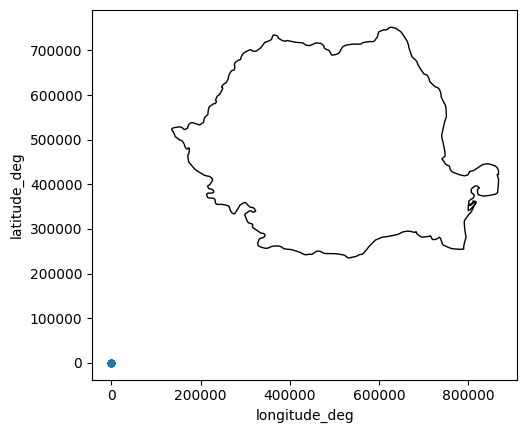

In [35]:
# let's plot

base = romania.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [36]:
#No proyectado

In [37]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=4326)# the coordinates were in degrees - unprojected cuando es longitud latitud

In [38]:
#Proyectado

In [39]:
airports=airports.to_crs(3844) #cambiar crs para proyectarlo

In [40]:
#Ejercicio 3.2 -> Se mostraran los puntos espaciales

<Axes: >

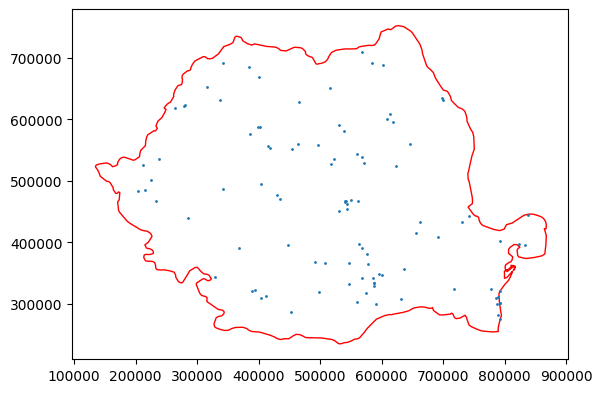

In [41]:
base = romania.plot(color='white', edgecolor='red')
airports.plot(ax=base,markersize=1)

In [42]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

In [43]:
airports['type'].value_counts()

type
small_airport     59
medium_airport    21
heliport          17
closed             4
large_airport      1
Name: count, dtype: int64

In [44]:
airports.rename(columns={'type':'kind'},inplace=True)

In [45]:
#Ejercicio 3.3 -> Se guarda la capa de los puntos espaciales en el mapa

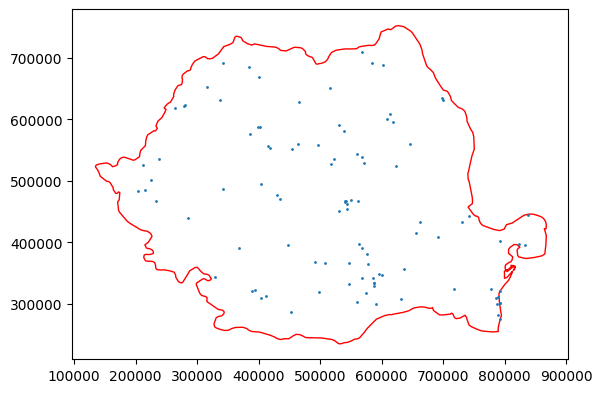

In [46]:
import matplotlib.pyplot as plt

base = romania.plot(color='white', edgecolor='red')
mapEnd=airports.plot(ax=base,markersize=1)

plt.savefig(os.path.join("figures",'mapRomania.jpg'))

In [47]:
romaniaCoord=[45.943161, 24.96676]

In [48]:
from folium import LayerControl


m = airports[airports.kind=='small_airport'].explore(color="red",name="small",show=False)
m = airports[airports.kind=='medium_airport'].explore(m=m, color="blue",name="medium",show=False)
m = airports[airports.kind=='large_airport'].explore(m=m, color="black",name="large",show=True)
m = airports[airports.kind=='closed'].explore(m=m, color="white",name="closed",show=False)
m = airports[airports.kind=='heliport'].explore(m=m, color="orange",name="heliport",show=False)

LayerControl(collapsed=False).add_to(m) 

m

In [49]:
#---------------------------------------------------------------------------

In [50]:
#Combing GeoDF rows

In [51]:
#Ejercicio 4.1 -> Se calcula el centroide de Romania

In [52]:
centroRomania=romania.centroid
centroRomania

0    POINT (498494.893 482206.445)
dtype: geometry

In [53]:
type(centroRomania), type(centroRomania.x)#cuando esta con x es una geoserie

(geopandas.geoseries.GeoSeries, pandas.core.series.Series)

In [54]:
type(centroRomania.x[0]),type(centroRomania.y[0])#valores numericos

(numpy.float64, numpy.float64)

<Axes: >

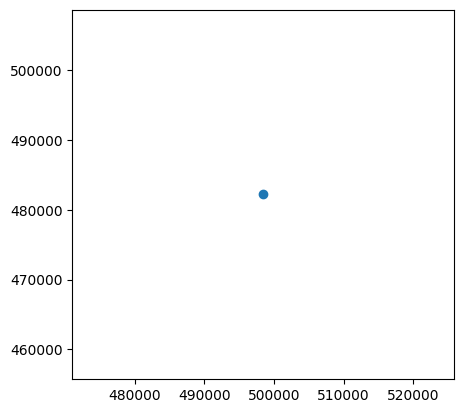

In [55]:
centroRomania.plot()

<Axes: title={'center': 'Below_Centroid'}>

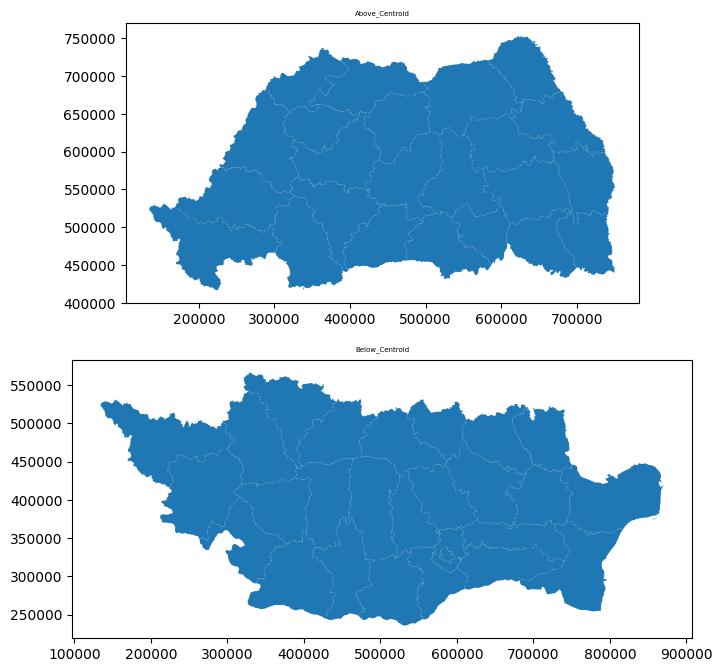

In [56]:
fig, axs = plt.subplots(nrows=2,ncols=1,sharex=False, sharey=False,figsize=(8,8))

centroidX=centroRomania.x[0]
centroidY=centroRomania.y[0]

axs[0].set_title('Above_Centroid',fontsize=5)
romania_municipalities.cx[:,centroidY:].plot(ax=axs[0]) 

axs[1].set_title('Below_Centroid',fontsize=5)
romania_municipalities.cx[:,:centroidY].plot(ax=axs[1]) 


In [57]:
#instead of:
romania_municipalities.cx[:centroidX,centroidY:]
#cx me permite hacer sub sets haciendo puntos, cx requiere un punto

Shape_Leng  Shape_Area          ADM2_RO ADM2_PCODE         ADM2_REF  \
4     7.199228    1.022137          Suceava   RO001332             None   
24    7.017993    0.903764             Arad   RO005029             None   
26    6.097576    0.818000        Hunedoara   RO005207             None   
27    8.409493    1.004357            Timiș   RO005350            Timis   
28    6.758141    0.890539            Bihor   RO006056             None   
29    5.550306    0.636700  Bistrița-Năsăud   RO006065  Bistrita-Nasaud   
30    8.333239    0.785774             Cluj   RO006127             None   
31    7.257454    0.754858        Maramureș   RO006243        Maramures   
32    5.985412    0.529550        Satu Mare   RO006305             None   
33    5.602104    0.458993            Sălaj   RO006314            Salaj   
34    7.618973    0.728905             Alba   RO007010             None   
35    5.872540    0.620326           Brașov   RO007083           Brasov   
37    6.957996    0.778812         Harghita   RO007190             None   
38    7.319137    0.787722            Mureș   RO007261            Mures   
39    5.890836    0.629600            Sibiu   RO007323             None   

   ADM2ALT1RO ADM2ALT2RO    ADM1_RO ADM1_PCODE  ADM0_EN  ADM0_RO ADM0_PCODE  \
4        None       None   Nord-Est      RO001  Romania  România         RO   
24       None       None       Vest      RO005  Romania  România         RO   
26       None       None       Vest      RO005  Romania  România         RO   
27       None       None       Vest      RO005  Romania  România         RO   
28       None       None  Nord-Vest      RO006  Romania  România         RO   
29       None       None  Nord-Vest      RO006  Romania  România         RO   
30       None       None  Nord-Vest      RO006  Romania  România         RO   
31       None       None  Nord-Vest      RO006  Romania  România         RO   
32       None       None  Nord-Vest      RO006  Romania  România         RO   
33       None       None  Nord-Vest      RO006  Romania  România         RO   
34       None       None     Centru      RO007  Romania  România         RO   
35       None       None     Centru      RO007  Romania  România         RO   
37       None       None     Centru      RO007  Romania  România         RO   
38       None       None     Centru      RO007  Romania  România         RO   
39       None       None     Centru      RO007  Romania  România         RO   

          date     validOn validTo  \
4   2022-03-09  2022-04-27    None   
24  2022-03-09  2022-04-27    None   
26  2022-03-09  2022-04-27    None   
27  2022-03-09  2022-04-27    None   
28  2022-03-09  2022-04-27    None   
29  2022-03-09  2022-04-27    None   
30  2022-03-09  2022-04-27    None   
31  2022-03-09  2022-04-27    None   
32  2022-03-09  2022-04-27    None   
33  2022-03-09  2022-04-27    None   
34  2022-03-09  2022-04-27    None   
35  2022-03-09  2022-04-27    None   
37  2022-03-09  2022-04-27    None   
38  2022-03-09  2022-04-27    None   
39  2022-03-09  2022-04-27    None   

                                             geometry  
4   POLYGON ((582154.982 720557.762, 582140.674 72...  
24  POLYGON ((321518.563 547741.459, 321500.263 54...  
26  POLYGON ((390464.587 442488.506, 390456.575 44...  
27  POLYGON ((168575.161 526910.937, 168661.836 52...  
28  POLYGON ((319725.347 651117.620, 319706.529 65...  
29  POLYGON ((497172.754 677521.597, 497195.315 67...  
30  MULTIPOLYGON (((394799.318 545880.504, 394806....  
31  POLYGON ((496152.428 692220.109, 496159.922 69...  
32  POLYGON ((387634.049 719841.057, 387678.422 71...  
33  POLYGON ((412574.332 649605.242, 412574.005 64...  
34  MULTIPOLYGON (((397418.011 547047.462, 397425....  
35  POLYGON ((535005.161 511698.257, 535005.224 51...  
37  POLYGON ((550344.694 621570.628, 550352.378 62...  
38  POLYGON ((518846.265 622078.593, 518831.084 62...  
39  MULTIPOLYGON (((495990.766 508822.641, 495983....

In [58]:
#Dissolve

In [59]:
# dissolving
romania_municipalities.cx[:centroidX,centroidY:].dissolve()

geometry  Shape_Leng  Shape_Area  \
0  POLYGON ((390424.527 442433.639, 390408.698 44...    7.199228    1.022137   

   ADM2_RO ADM2_PCODE ADM2_REF ADM2ALT1RO ADM2ALT2RO   ADM1_RO ADM1_PCODE  \
0  Suceava   RO001332    Timis       None       None  Nord-Est      RO001   

   ADM0_EN  ADM0_RO ADM0_PCODE        date     validOn validTo  
0  Romania  România         RO  2022-03-09  2022-04-27    None

In [60]:
type(romania_municipalities.cx[:centroidX,centroidY:].dissolve())

geopandas.geodataframe.GeoDataFrame

<Axes: >

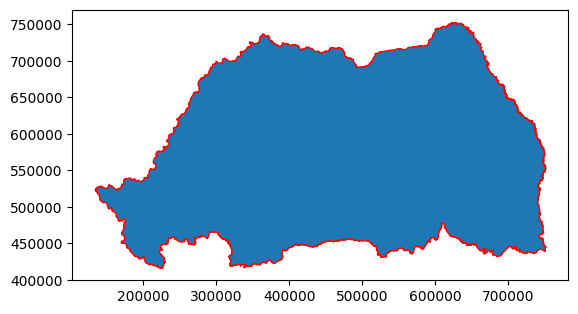

In [61]:
romania_municipalities.cx[:,centroidY:].dissolve().plot(edgecolor='red')

<Axes: >

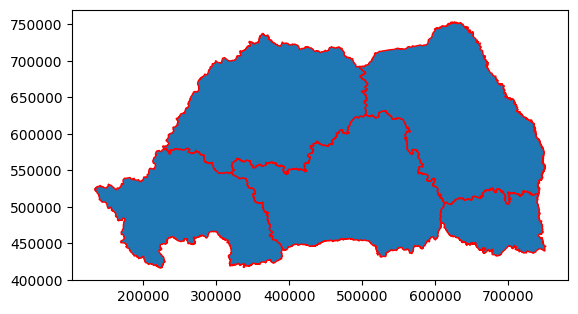

In [62]:
# the municipalities by state
romania_municipalities.cx[:,centroidY:].dissolve(by='ADM1_RO').plot(edgecolor='red')

In [63]:
#Unary Union

In [64]:
#Ejercicio 4.2 -> Se combinan los poligonos

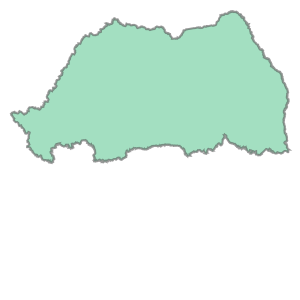

In [65]:
romania_municipalities.cx[:,centroidY:].unary_union

<Axes: >

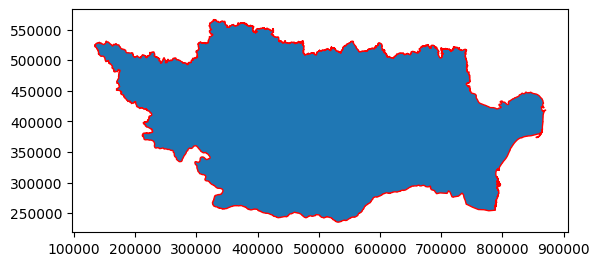

In [66]:
romania_municipalities.cx[:,:centroidY].dissolve().plot(edgecolor='red')

<Axes: >

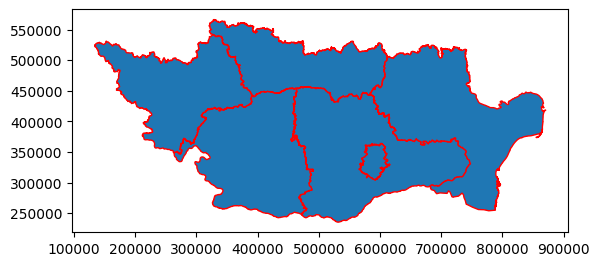

In [67]:
# the municipalities by state
romania_municipalities.cx[:,:centroidY].dissolve(by='ADM1_RO').plot(edgecolor='red')

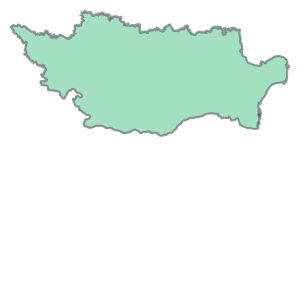

In [68]:
romania_municipalities.cx[:,:centroidY:].unary_union

In [69]:
type(romania_municipalities.cx[:,centroidY:].unary_union)
#devuelve una geometria

shapely.geometry.polygon.Polygon

In [70]:
gpd.GeoDataFrame(index=[0],
                 crs=romania_municipalities.crs,
                 geometry=[romania_municipalities.cx[:centroidX,centroidY:].unary_union])

geometry
0  POLYGON ((390424.527 442433.639, 390408.698 44...

In [71]:
#Parte de arriba

In [72]:
# you create
Romania_top=romania_municipalities.cx[:,centroidY:].dissolve()
# you get
Romania_top

geometry  Shape_Leng  Shape_Area  \
0  POLYGON ((390424.527 442433.639, 390408.698 44...    6.558193    0.775128   

  ADM2_RO ADM2_PCODE ADM2_REF ADM2ALT1RO ADM2ALT2RO   ADM1_RO ADM1_PCODE  \
0   Bacău   RO001047    Bacau       None       None  Nord-Est      RO001   

   ADM0_EN  ADM0_RO ADM0_PCODE        date     validOn validTo  
0  Romania  România         RO  2022-03-09  2022-04-27    None

In [73]:
Romania_top['zone']='N' # add column
Romania_top=Romania_top.loc[:,['ADM0_EN','zone','geometry']]   # keep some

# result
Romania_top

ADM0_EN zone                                           geometry
0  Romania    N  POLYGON ((390424.527 442433.639, 390408.698 44...

In [74]:
#Parte de abajo

In [75]:
# you create
Romania_bottom=romania_municipalities.cx[:, :centroidY:].dissolve()
# you get
Romania_bottom

geometry  Shape_Leng  Shape_Area  \
0  MULTIPOLYGON (((554281.226 243721.717, 553758....    4.669359     0.54461   

  ADM2_RO ADM2_PCODE ADM2_REF ADM2ALT1RO ADM2ALT2RO  ADM1_RO ADM1_PCODE  \
0  Brăila   RO002092   Braila       None       None  Sud-Est      RO002   

   ADM0_EN  ADM0_RO ADM0_PCODE        date     validOn validTo  
0  Romania  România         RO  2022-03-09  2022-04-27    None

In [76]:
Romania_bottom['zone']='S' # add column
Romania_bottom=Romania_bottom.loc[:,['ADM0_EN','zone','geometry']]   # keep some

# result
Romania_bottom

ADM0_EN zone                                           geometry
0  Romania    S  MULTIPOLYGON (((554281.226 243721.717, 553758....

In [77]:
romania_municipalities

Shape_Leng  Shape_Area          ADM2_RO ADM2_PCODE         ADM2_REF  \
0     6.558193    0.775128            Bacău   RO001047            Bacau   
1     5.637132    0.599211         Botoșani   RO001074         Botosani   
2     8.258205    0.650137             Iași   RO001225             Iasi   
3     6.423956    0.697207            Neamț   RO001270            Neamt   
4     7.199228    1.022137          Suceava   RO001332             None   
5     6.864717    0.623330           Vaslui   RO001378             None   
6     4.669359    0.544610           Brăila   RO002092           Braila   
7     6.659393    0.699301            Buzău   RO002109            Buzau   
8     7.177743    0.799736        Constanța   RO002136        Constanta   
9     5.179134    0.516608           Galați   RO002172           Galati   
10    6.261611    0.968252           Tulcea   RO002369             None   
11    5.467467    0.561734          Vrancea   RO002396             None   
12    6.828279    0.779364            Argeș   RO003038            Arges   
13    5.597583    0.460757        Dâmbovița   RO003154        Dambovita   
14    6.106233    0.504861         Ialomița   RO003216         Ialomita   
15    5.303845    0.539299          Prahova   RO003298             None   
16    5.467646    0.650939        Teleorman   RO003341             None   
17    5.768179    0.573908         Călărași   RO003519         Calarasi   
18    5.059607    0.398734          Giurgiu   RO003528             None   
19    5.886813    0.835129             Dolj   RO004163             None   
20    5.282770    0.636029             Gorj   RO004181             None   
21    6.515294    0.559970        Mehedinți   RO004252        Mehedinti   
22    6.715507    0.620157              Olt   RO004289             None   
23    5.973570    0.659183           Vâlcea   RO004387           Valcea   
24    7.017993    0.903764             Arad   RO005029             None   
25    6.627564    0.975984    Caraș-Severin   RO005118    Caras-Severin   
26    6.097576    0.818000        Hunedoara   RO005207             None   
27    8.409493    1.004357            Timiș   RO005350            Timis   
28    6.758141    0.890539            Bihor   RO006056             None   
29    5.550306    0.636700  Bistrița-Năsăud   RO006065  Bistrita-Nasaud   
30    8.333239    0.785774             Cluj   RO006127             None   
31    7.257454    0.754858        Maramureș   RO006243        Maramures   
32    5.985412    0.529550        Satu Mare   RO006305             None   
33    5.602104    0.458993            Sălaj   RO006314            Salaj   
34    7.618973    0.728905             Alba   RO007010             None   
35    5.872540    0.620326           Brașov   RO007083           Brasov   
36    4.671326    0.430253          Covasna   RO007145             None   
37    6.957996    0.778812         Harghita   RO007190             None   
38    7.319137    0.787722            Mureș   RO007261            Mures   
39    5.890836    0.629600            Sibiu   RO007323             None   
40    4.637579    0.177039            Ilfov   RO008234             None   
41    1.143144    0.027016        București   RO008403        Bucuresti   

   ADM2ALT1RO ADM2ALT2RO          ADM1_RO ADM1_PCODE  ADM0_EN  ADM0_RO  \
0        None       None         Nord-Est      RO001  Romania  România   
1        None       None         Nord-Est      RO001  Romania  România   
2        None       None         Nord-Est      RO001  Romania  România   
3        None       None         Nord-Est      RO001  Romania  România   
4        None       None         Nord-Est      RO001  Romania  România   
5        None       None         Nord-Est      RO001  Romania  România   
6        None       None          Sud-Est      RO002  Romania  România   
7        None       None          Sud-Est      RO002  Romania  România   
8        None       None          Sud-Est      RO002  Romania  România   
9        None       None          Sud-

In [78]:
#diferencia

# tuple with count of rows
rowsCX=(romania_municipalities.cx[:centroRomania.x[0],centroRomania.y[0]:].shape[0],\
        romania_municipalities.cx[centroRomania.x[0]:, :centroRomania.y[0]].shape[0])

sum(rowsCX)

32

In [79]:
# coincidences:
len(set(romania_municipalities.cx[:centroRomania.x[0],centroRomania.y[0]:].ADM2_PCODE). \
intersection(set(romania_municipalities.cx[centroRomania.x[0]:,centroRomania.y[0]:].ADM2_PCODE)))

6

In [80]:
romania_municipalities.shape[0]

42

In [81]:
#Ejercicio 4.3 y 4.4 -> Se detecto la cantidad de duplicados y se procedera a plotear el mapa con los duplicados

<Axes: >

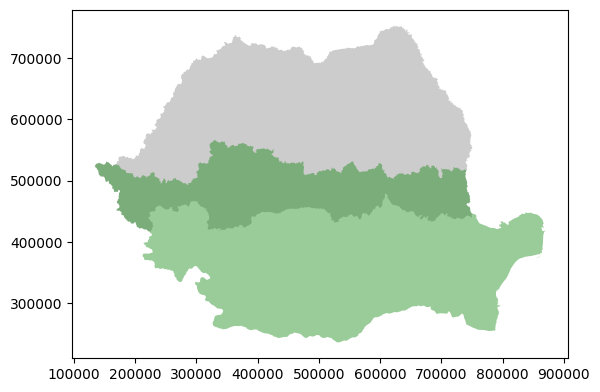

In [82]:
base=Romania_top.plot(facecolor='gray', alpha=0.4)
Romania_bottom.plot(ax=base,facecolor='green', alpha=0.4)

In [83]:
#------------------------------------------------------------------------------

In [84]:
#Creating the convex hull

In [85]:
#Ejercicio 5.1 -> Se seleccionan los puntos de helipuertos de Romania

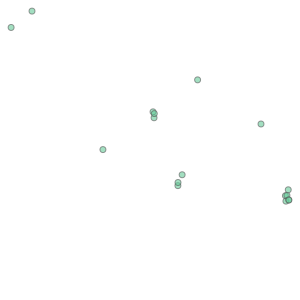

In [86]:
# just the union
heliport=airports[airports.kind=='heliport']
heliport.unary_union

In [87]:
#Ejercicio 5.2 -> Se crea un poligono convexo mediante los puntos

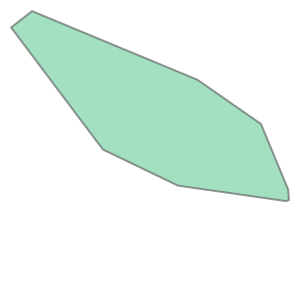

In [88]:
# hull of the union
heliport.unary_union.convex_hull

In [89]:
#Ejercicio 5.3 -> Se convierte el convexo a un GDF

In [90]:
Heliport_hull= gpd.GeoDataFrame(index=[0],
                                    crs=heliport.crs,
                                    geometry=[heliport.unary_union.convex_hull])
Heliport_hull['name']='heliport hull' 

# then

Heliport_hull

geometry           name
0  POLYGON ((787442.825 299935.706, 587273.630 32...  heliport hull

In [91]:
#Ejercicio 5.4 -> Se traza el convexo de Helipuertos (GDF) encima del mapa de Romania

<Axes: >

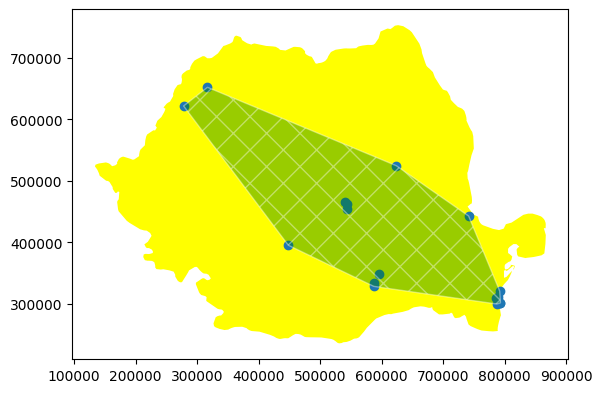

In [92]:
base=romania.plot(facecolor='yellow')
heliport.plot(ax=base)
Heliport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

In [93]:
#-------------------------------------------------------------------------

In [94]:
#Spatial Overlay

In [95]:
# the north
MunisN_romania=romania_municipalities.cx[:,centroidY:]
# the south
MunisS_romania=romania_municipalities.cx[:,:centroidY]
# the west
MunisW_romania=romania_municipalities.cx[:centroidX,:]
# the east
MunisE_romania=romania_municipalities.cx[centroidX:,:]

In [96]:
#Intersection

In [97]:
munisMidNS_romania=MunisN_romania.overlay(MunisS_romania, how="intersection",keep_geom_type=True)
munisMidNS_romania

Shape_Leng_1  Shape_Area_1  ADM2_RO_1 ADM2_PCODE_1 ADM2_REF_1 ADM2ALT1RO_1  \
0      5.467467      0.561734    Vrancea     RO002396       None         None   
1      4.671326      0.430253    Covasna     RO007145       None         None   
2      5.179134      0.516608     Galați     RO002172     Galati         None   
3      6.097576      0.818000  Hunedoara     RO005207       None         None   
4      8.409493      1.004357      Timiș     RO005350      Timis         None   
5      7.618973      0.728905       Alba     RO007010       None         None   
6      5.890836      0.629600      Sibiu     RO007323       None         None   
7      5.872540      0.620326     Brașov     RO007083     Brasov         None   

  ADM2ALT2RO_1 ADM1_RO_1 ADM1_PCODE_1 ADM0_EN_1  ... ADM2ALT2RO_2 ADM1_RO_2  \
0         None   Sud-Est        RO002   Romania  ...         None   Sud-Est   
1         None    Centru        RO007   Romania  ...         None    Centru   
2         None   Sud-Est        RO002   Romania  ...         None   Sud-Est   
3         None      Vest        RO005   Romania  ...         None      Vest   
4         None      Vest        RO005   Romania  ...         None      Vest   
5         None    Centru        RO007   Romania  ...         None    Centru   
6         None    Centru        RO007   Romania  ...         None    Centru   
7         None    Centru        RO007   Romania  ...         None    Centru   

  ADM1_PCODE_2 ADM0_EN_2 ADM0_RO_2  ADM0_PCODE_2      date_2   validOn_2  \
0        RO002   Romania   România            RO  2022-03-09  2022-04-27   
1        RO007   Romania   România            RO  2022-03-09  2022-04-27   
2        RO002   Romania   România            RO  2022-03-09  2022-04-27   
3        RO005   Romania   România            RO  2022-03-09  2022-04-27   
4        RO005   Romania   România            RO  2022-03-09  2022-04-27   
5        RO007   Romania   România            RO  2022-03-09  2022-04-27   
6        RO007   Romania   România            RO  2022-03-09  2022-04-27   
7        RO007   Romania   România            RO  2022-03-09  2022-04-27   

  validTo_2                                           geometry  
0      None  POLYGON ((692601.733 520738.732, 692602.081 52...  
1      None  POLYGON ((597541.528 528187.062, 597549.061 52...  
2      None  POLYGON ((740990.210 516672.690, 741037.874 51...  
3      None  POLYGON ((390456.575 442477.533, 390432.734 44...  
4      None  POLYGON ((168661.836 526939.661, 168787.689 52...  
5      None  MULTIPOLYGON (((393269.879 479628.003, 393277....  
6      None  MULTIPOLYGON (((393262.492 479650.359, 393270....  
7      None  POLYGON ((535005.224 511687.145, 535013.584 51...  

[8 rows x 31 columns]

In [98]:
MunisN_romania.sjoin(MunisS_romania, how="inner", predicate='contains')

Shape_Leng_left  Shape_Area_left ADM2_RO_left ADM2_PCODE_left  \
9          5.179134         0.516608       Galați        RO002172   
11         5.467467         0.561734      Vrancea        RO002396   
26         6.097576         0.818000    Hunedoara        RO005207   
27         8.409493         1.004357        Timiș        RO005350   
34         7.618973         0.728905         Alba        RO007010   
35         5.872540         0.620326       Brașov        RO007083   
36         4.671326         0.430253      Covasna        RO007145   
39         5.890836         0.629600        Sibiu        RO007323   

   ADM2_REF_left ADM2ALT1RO_left ADM2ALT2RO_left ADM1_RO_left ADM1_PCODE_left  \
9         Galati            None            None      Sud-Est           RO002   
11          None            None            None      Sud-Est           RO002   
26          None            None            None         Vest           RO005   
27         Timis            None            None         Vest           RO005   
34          None            None            None       Centru           RO007   
35        Brasov            None            None       Centru           RO007   
36          None            None            None       Centru           RO007   
39          None            None            None       Centru           RO007   

   ADM0_EN_left  ... ADM2ALT1RO_right ADM2ALT2RO_right ADM1_RO_right  \
9       Romania  ...             None             None       Sud-Est   
11      Romania  ...             None             None       Sud-Est   
26      Romania  ...             None             None          Vest   
27      Romania  ...             None             None          Vest   
34      Romania  ...             None             None        Centru   
35      Romania  ...             None             None        Centru   
36      Romania  ...             None             None        Centru   
39      Romania  ...             None             None        Centru   

   ADM1_PCODE_right ADM0_EN_right ADM0_RO_right  ADM0_PCODE_right  date_right  \
9             RO002       Romania       România                RO  2022-03-09   
11            RO002       Romania       România                RO  2022-03-09   
26            RO005       Romania       România                RO  2022-03-09   
27            RO005       Romania       România                RO  2022-03-09   
34            RO007       Romania       România                RO  2022-03-09   
35            RO007       Romania       România                RO  2022-03-09   
36            RO007       Romania       România                RO  2022-03-09   
39            RO007       Romania       România                RO  2022-03-09   

    validOn_right validTo_right  
9      2022-04-27          None  
11     2022-04-27          None  
26     2022-04-27          None  
27     2022-04-27          None  
34     2022-04-27          None  
35     2022-04-27          None  
36     2022-04-27          None  
39     2022-04-27          None  

[8 rows x 32 columns]

<Axes: >

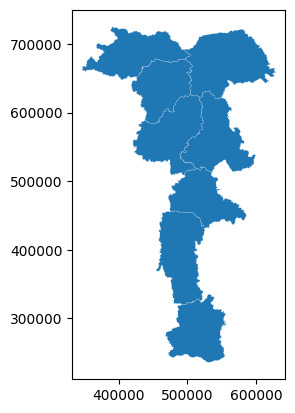

In [99]:
munisMidWE_romania=MunisW_romania.overlay(MunisE_romania, how="intersection",keep_geom_type=True)
munisMidWE_romania.plot(edgecolor='white',linewidth=0.1)

In [100]:
#Union

In [101]:
munisMidNS_romania.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Shape_Leng_1  8 non-null      float64 
 1   Shape_Area_1  8 non-null      float64 
 2   ADM2_RO_1     8 non-null      object  
 3   ADM2_PCODE_1  8 non-null      object  
 4   ADM2_REF_1    3 non-null      object  
 5   ADM2ALT1RO_1  0 non-null      object  
 6   ADM2ALT2RO_1  0 non-null      object  
 7   ADM1_RO_1     8 non-null      object  
 8   ADM1_PCODE_1  8 non-null      object  
 9   ADM0_EN_1     8 non-null      object  
 10  ADM0_RO_1     8 non-null      object  
 11  ADM0_PCODE_1  8 non-null      object  
 12  date_1        8 non-null      object  
 13  validOn_1     8 non-null      object  
 14  validTo_1     0 non-null      object  
 15  Shape_Leng_2  8 non-null      float64 
 16  Shape_Area_2  8 non-null      float64 
 17  ADM2_RO_2     8 non-null      object  
 18  ADM2_P

In [102]:
munisMidWE_romania.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Shape_Leng_1  8 non-null      float64 
 1   Shape_Area_1  8 non-null      float64 
 2   ADM2_RO_1     8 non-null      object  
 3   ADM2_PCODE_1  8 non-null      object  
 4   ADM2_REF_1    5 non-null      object  
 5   ADM2ALT1RO_1  0 non-null      object  
 6   ADM2ALT2RO_1  0 non-null      object  
 7   ADM1_RO_1     8 non-null      object  
 8   ADM1_PCODE_1  8 non-null      object  
 9   ADM0_EN_1     8 non-null      object  
 10  ADM0_RO_1     8 non-null      object  
 11  ADM0_PCODE_1  8 non-null      object  
 12  date_1        8 non-null      object  
 13  validOn_1     8 non-null      object  
 14  validTo_1     0 non-null      object  
 15  Shape_Leng_2  8 non-null      float64 
 16  Shape_Area_2  8 non-null      float64 
 17  ADM2_RO_2     8 non-null      object  
 18  ADM2_P

In [103]:
keep=['ADM0_EN_1','ADM1_RO_1','ADM2_RO_1','geometry']
munisMidNS_romania=munisMidNS_romania.loc[:,keep]
munisMidWE_romania=munisMidWE_romania.loc[:,keep]

In [104]:
munisMidNS_romania.overlay(munisMidWE_romania,how="union",keep_geom_type=True)

ADM0_EN_1_1 ADM1_RO_1_1 ADM2_RO_1_1 ADM0_EN_1_2 ADM1_RO_1_2  \
0      Romania      Centru      Brașov     Romania      Centru   
1      Romania     Sud-Est     Vrancea         NaN         NaN   
2      Romania      Centru     Covasna         NaN         NaN   
3      Romania     Sud-Est      Galați         NaN         NaN   
4      Romania        Vest   Hunedoara         NaN         NaN   
5      Romania        Vest       Timiș         NaN         NaN   
6      Romania      Centru        Alba         NaN         NaN   
7      Romania      Centru       Sibiu         NaN         NaN   
8          NaN         NaN         NaN     Romania    Nord-Est   
9          NaN         NaN         NaN     Romania   Nord-Vest   
10         NaN         NaN         NaN     Romania   Nord-Vest   
11         NaN         NaN         NaN     Romania      Centru   
12         NaN         NaN         NaN     Romania      Centru   
13         NaN         NaN         NaN     Romania         Sud   
14         NaN         NaN         NaN     Romania         Sud   

        ADM2_RO_1_2                                           geometry  
0            Brașov  POLYGON ((535013.584 511576.064, 535013.773 51...  
1               NaN  POLYGON ((692601.733 520738.732, 692602.081 52...  
2               NaN  POLYGON ((597564.480 528198.542, 597579.899 52...  
3               NaN  POLYGON ((740990.210 516672.690, 741037.874 51...  
4               NaN  POLYGON ((390456.575 442477.533, 390432.734 44...  
5               NaN  POLYGON ((168661.836 526939.661, 168787.689 52...  
6               NaN  MULTIPOLYGON (((393270.071 479639.114, 393269....  
7               NaN  MULTIPOLYGON (((393262.492 479650.359, 393270....  
8           Suceava  POLYGON ((582140.674 720513.077, 582126.367 72...  
9   Bistrița-Năsăud  POLYGON ((497195.315 677521.585, 497202.840 67...  
10        Maramureș  POLYGON ((496159.922 692208.986, 496167.416 69...  
11         Harghita  POLYGON ((550413.761 621482.279, 550429.224 62...  
12            Mureș  POLYGON ((518725.197 621955.945, 518702.529 62...  
13            Argeș  POLYGON ((476992.861 357000.759, 476984.938 35...  
14        Teleorman  POLYGON ((539169.210 330332.687, 539361.584 33...

In [105]:
# appending
pd.concat([munisMidNS_romania,munisMidWE_romania],ignore_index=True)

ADM0_EN_1  ADM1_RO_1        ADM2_RO_1  \
0    Romania    Sud-Est          Vrancea   
1    Romania     Centru          Covasna   
2    Romania    Sud-Est           Galați   
3    Romania       Vest        Hunedoara   
4    Romania       Vest            Timiș   
5    Romania     Centru             Alba   
6    Romania     Centru            Sibiu   
7    Romania     Centru           Brașov   
8    Romania   Nord-Est          Suceava   
9    Romania  Nord-Vest  Bistrița-Năsăud   
10   Romania  Nord-Vest        Maramureș   
11   Romania     Centru         Harghita   
12   Romania     Centru            Mureș   
13   Romania        Sud            Argeș   
14   Romania        Sud        Teleorman   
15   Romania     Centru           Brașov   

                                             geometry  
0   POLYGON ((692601.733 520738.732, 692602.081 52...  
1   POLYGON ((597541.528 528187.062, 597549.061 52...  
2   POLYGON ((740990.210 516672.690, 741037.874 51...  
3   POLYGON ((390456.575 442477.533, 390432.734 44...  
4   POLYGON ((168661.836 526939.661, 168787.689 52...  
5   MULTIPOLYGON (((393269.879 479628.003, 393277....  
6   MULTIPOLYGON (((393262.492 479650.359, 393270....  
7   POLYGON ((535005.224 511687.145, 535013.584 51...  
8   POLYGON ((582140.674 720513.077, 582126.367 72...  
9   POLYGON ((497195.315 677521.585, 497202.840 67...  
10  POLYGON ((496159.922 692208.986, 496167.416 69...  
11  POLYGON ((550352.378 621559.576, 550390.801 62...  
12  POLYGON ((518831.084 622078.546, 518808.382 62...  
13  POLYGON ((477000.744 356989.619, 476992.821 35...  
14  POLYGON ((539169.210 330332.687, 539361.584 33...  
15  POLYGON ((535005.224 511687.145, 535013.584 51...

In [106]:
#Ejercicio 6.1 -> Interseccion total en Romania

<Axes: >

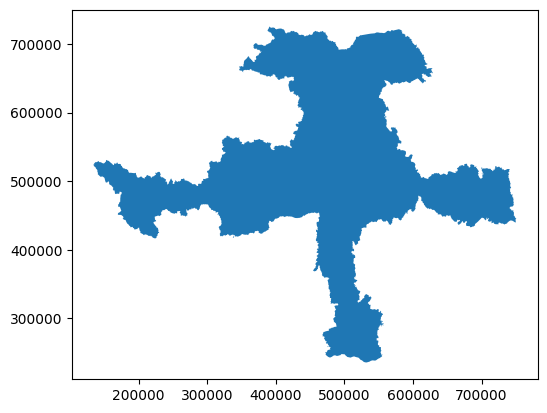

In [107]:
munisMidNS_romania.dissolve().overlay(munisMidWE_romania.dissolve(), how="union",keep_geom_type=True).dissolve().plot()

In [108]:
muniMidRomania=munisMidNS_romania.dissolve().overlay(munisMidWE_romania.dissolve(), how="union",keep_geom_type=True).dissolve()
muniMidRomania

geometry ADM0_EN_1_1 ADM1_RO_1_1  \
0  MULTIPOLYGON (((476992.821 356989.647, 476992....     Romania     Sud-Est   

  ADM2_RO_1_1 ADM0_EN_1_2 ADM1_RO_1_2 ADM2_RO_1_2  
0     Vrancea     Romania    Nord-Est     Suceava

In [109]:
# some cleaning

muniMidRomania['zone']='middles'
muniMidRomania=muniMidRomania.loc[:,['ADM0_EN_1_1','zone','geometry']]   
muniMidRomania

ADM0_EN_1_1     zone                                           geometry
0     Romania  middles  MULTIPOLYGON (((476992.821 356989.647, 476992....

In [110]:
#Ejercicio 6.2 -> Diferencia simetrica total en Romania

<Axes: >

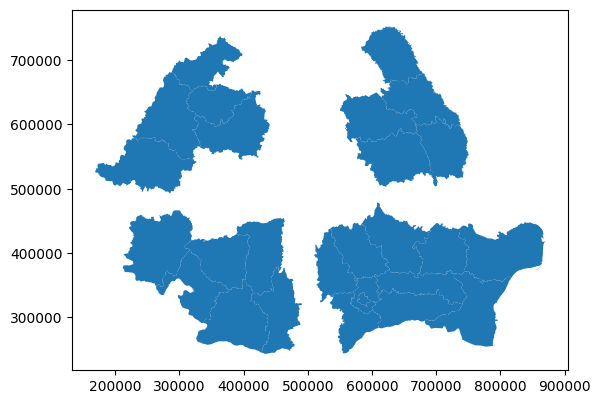

In [111]:
# with the municipalities
romania_municipalities.overlay(muniMidRomania, how='difference').plot()

In [112]:
# you create
Romania_topLeft=romania_municipalities.cx[:centroidX,centroidY:].dissolve()
# you get
Romania_topLeft

geometry  Shape_Leng  Shape_Area  \
0  POLYGON ((390424.527 442433.639, 390408.698 44...    7.199228    1.022137   

   ADM2_RO ADM2_PCODE ADM2_REF ADM2ALT1RO ADM2ALT2RO   ADM1_RO ADM1_PCODE  \
0  Suceava   RO001332    Timis       None       None  Nord-Est      RO001   

   ADM0_EN  ADM0_RO ADM0_PCODE        date     validOn validTo  
0  Romania  România         RO  2022-03-09  2022-04-27    None

In [113]:
Romania_topLeft['zone']='NW' # add column
Romania_topLeft=Romania_topLeft.loc[:,['ADM0_EN','zone','geometry']]   # keep some

# result
Romania_topLeft

ADM0_EN zone                                           geometry
0  Romania   NW  POLYGON ((390424.527 442433.639, 390408.698 44...

<Axes: >

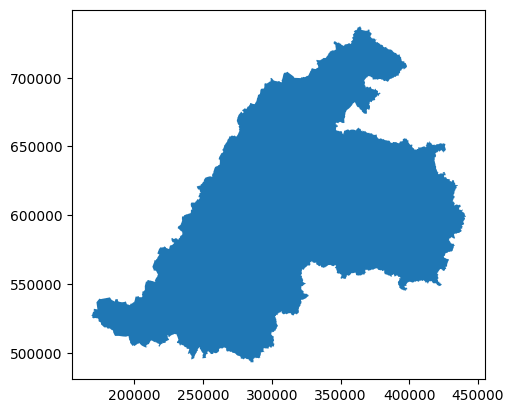

In [114]:
Romania_topLeft.overlay(muniMidRomania, how='difference').plot()

In [115]:
#Symmetric Difference

<Axes: >

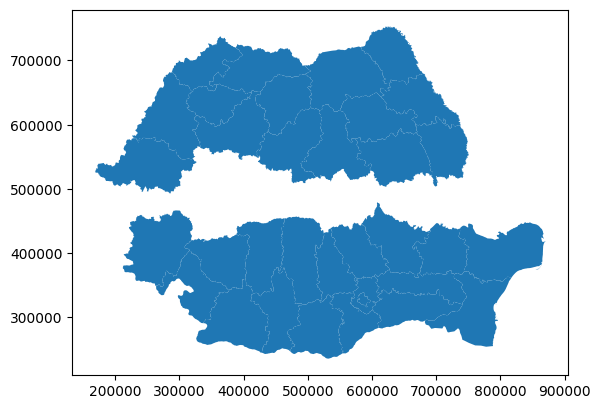

In [116]:
MunisN_romania.overlay(MunisS_romania, how="symmetric_difference",keep_geom_type=False).plot()

In [ ]:
MunisW_romania.overlay(MunisE_romania, how="symmetric_difference",keep_geom_type=False).plot()

In [ ]:
#se muestra el hull de cada division de Romania (en cuatro) y superpuesto se coloca el hull de los helipuertos de Romania

In [ ]:
Romania_AirTopLeft=airports[airports.kind=='medium_airport'].cx[:centroidX,centroidY:]
Romania_AirTopRight=airports[airports.kind=='medium_airport'].cx[centroidX:,centroidY:]
Romania_AirBottomLeft=airports[airports.kind=='medium_airport'].cx[:centroidX,:centroidY]
Romania_AirBottomRight=airports[airports.kind=='medium_airport'].cx[centroidX:,:centroidY]

In [ ]:
base=Romania_AirTopLeft.plot(facecolor='grey', alpha=0.4)
Romania_AirTopRight.plot(ax=base,facecolor='orange', alpha=0.4)
Romania_AirBottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
Romania_AirBottomRight.plot(ax=base,facecolor='red', alpha=0.4)

In [ ]:
# hulls for the mid size airports:
Romania_AirTopLeft_hull=Romania_AirTopLeft.dissolve().convex_hull
Romania_AirTopRight_hull=Romania_AirTopRight.dissolve().convex_hull
Romania_AirBottomLeft_hull=Romania_AirBottomLeft.dissolve().convex_hull
Romania_AirBottomRight_hull=Romania_AirBottomRight.dissolve().convex_hull

In [ ]:
base = romania.plot(color='white', edgecolor='black') 
muniMidRomania.plot(ax=base,facecolor='magenta',alpha=0.4) 
Heliport_hull.plot(ax=base,facecolor='purple',alpha=0.4)
Romania_AirTopLeft_hull.plot(ax=base,facecolor='grey', alpha=0.4)
Romania_AirTopRight_hull.plot(ax=base,facecolor='orange', alpha=0.4)
Romania_AirBottomLeft_hull.plot(ax=base,facecolor='green', alpha=0.4)
Romania_AirBottomRight_hull.plot(ax=base,facecolor='red', alpha=0.4)

In [ ]:
#se muestra el hull de cada division de Romania (en dos) y superpuesto se coloca el hull de los helipuertos de Romania

In [ ]:
Romania_AirTop=airports[airports.kind=='medium_airport'].cx[:,centroidY:]
Romania_AirBottom=airports[airports.kind=='medium_airport'].cx[:, :centroidY:] 

In [ ]:
base=Romania_AirTop.plot(facecolor='grey', alpha=0.4)
Romania_AirBottom.plot(ax=base,facecolor='green', alpha=0.4)

In [ ]:
# hulls for the mid size airports:
Romania_AirTop_hull=Romania_AirTop.dissolve().convex_hull
Romania_AirBottom_hull=Romania_AirBottom.dissolve().convex_hull

In [ ]:
munisMidNS_romania=MunisN_romania.overlay(MunisS_romania, how="intersection",keep_geom_type=True)
munisMidNS_romania.plot(edgecolor='white',linewidth=0.1)

In [ ]:
base = romania.plot(color='white', edgecolor='black') 
munisMidNS_romania.plot(ax=base,facecolor='magenta',alpha=0.4) 
Heliport_hull.plot(ax=base,facecolor='purple',alpha=0.4)

Romania_AirTop_hull.plot(ax=base,facecolor='grey', alpha=0.4)
Romania_AirBottom_hull.plot(ax=base,facecolor='green', alpha=0.4)

In [ ]:
romania.to_file(os.path.join("maps","romaniaMaps_3844_all.gpkg"),layer='country', driver="GPKG")
romania_cities.to_file(os.path.join("maps","romaniaMaps_3844_all.gpkg"),layer='cities', driver="GPKG")
romania_rivers.to_file(os.path.join("maps","romaniaMaps_3844_all.gpkg"),layer='rivers', driver="GPKG")
romania.to_file(os.path.join("maps","romaniaMaps_3844_all.gpkg"),layer='airports', driver="GPKG")
romania_border.to_file(os.path.join("maps","romaniaMaps_3844_all.gpkg"), layer='border', driver="GPKG")
romania_states.to_file(os.path.join("maps","romaniaMaps_3844_all.gpkg"), layer='states', driver="GPKG")
romania_municipalities.to_file(os.path.join("maps","romaniaMaps_3844_all.gpkg"), layer='municipalities', driver="GPKG")